In [1]:
#htsf\Scripts\activate    

# Import libraries
import pandas as pd
import numpy as np
#import matplotlib.pylab as plt ### Remove
#plt.style.use('bmh') ### Remove

import sys, os
sys.path.append(os.path.join(os.path.dirname('__file__'), '..', 'src'))
import hyperarch
from utils import get_sample_data, plot_single

%matplotlib inline

# Read data
h_df = get_sample_data(verbose = True)
g_df = get_sample_data(agg_type='grouped')

,date,category,subcategory,value
0,2010-01-01,category 1,subcat 1,1.0
1,2010-02-01,category 1,subcat 1,2.0
2,2010-03-01,category 1,subcat 1,3.0
3,2010-04-01,category 1,subcat 1,3.3
4,2010-05-01,category 1,subcat 1,5.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         420 non-null    datetime64[ns]
 1   category     420 non-null    object        
 2   subcategory  420 non-null    object        
 3   value        420 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.2+ KB
Min Date: 2010-01-01 00:00:00
Max Date: 2016-12-01 00:00:00
category:
count            420
unique             2
top       category 1
freq             252
Name: category, dtype: object

subcategory:
count          420
unique           5
top       subcat 1
freq            84
Name: subcategory, dtype: object

value:
count    420.000000
mean       8.067143
std        6.852313
min        0.000000
25%        3.200000
50%        6.000000
75%       10.425000
max       40.200000
Name: value, dtype: float64



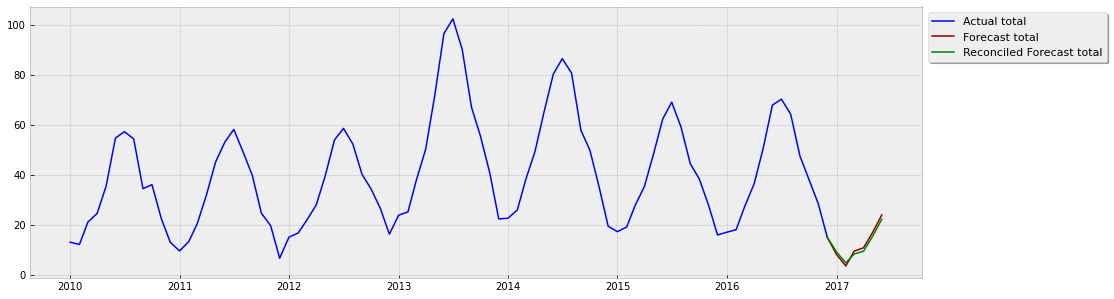

In [2]:
# Hierarchy
hierarchy_df, h_bottom, h_labels = hyperarch.get_hierarchal(h_df, 'category', 'subcategory', agg_type='hierarchy')   
h_s = hyperarch.get_S(h_bottom, h_labels, agg_type='hierarchy')
h_models = hyperarch.get_arima_models(hierarchy_df, order=(1, 2, 12), steps_out=6, make_stationary=False)
h_yhat = hyperarch.get_forecast_matrix(h_models)
h_reconciled_yhat = hyperarch.reconcile(h_yhat, h_s, method='ols')
hdf_pred, hdf_rec = hyperarch.predict_hier(hierarchy_df, h_yhat, h_reconciled_yhat, h_labels, h_models['index'])
plot_single(hdf_pred, hdf_rec)

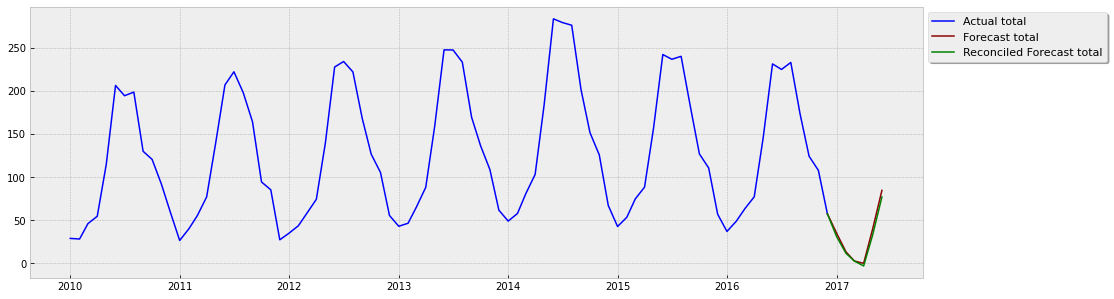

In [3]:
# Grouped
grouped_df, g_bottom, g_labels = hyperarch.get_hierarchal(g_df, 'category', 'subcategory', agg_type='grouped')   
g_s = hyperarch.get_S(g_bottom, g_labels, agg_type='grouped')
g_models = hyperarch.get_arima_models(grouped_df, order=(1, 2, 12), steps_out=6, make_stationary=False)
g_yhat = hyperarch.get_forecast_matrix(g_models)
g_reconciled_yhat = hyperarch.reconcile(g_yhat, g_s, method='ols')
gdf_pred, gdf_rec = hyperarch.predict_hier(grouped_df, g_yhat, g_reconciled_yhat, g_labels, g_models['index'])
plot_single(gdf_pred, gdf_rec)